# Image Augmentation #

* 圖像隨機旋轉(rotate)
* 圖像隨機偏移(shift)
* 圖像隨機推移錯切(shear)
* 圖像隨機翻轉(flip)
* Sample-wise 圖像像素標準化
* Feature-wise 圖像像素標準化
* ZCA 白化轉換
* 圖像張量維度的重排序
* 儲存增強圖像數據

In [1]:
import matplotlib.pyplot as plt

def draw_subplot(X_train,y_train):
    plt.figure(figsize=(8,8)) 

    for i in range(0, 9):
        plt.subplot(330+1+i) 
        plt.title(y_train[i])
        plt.axis('off')     
        plt.imshow(X_train[i], cmap=plt.get_cmap('gray')) # grayscale

    plt.show()

Using TensorFlow backend.


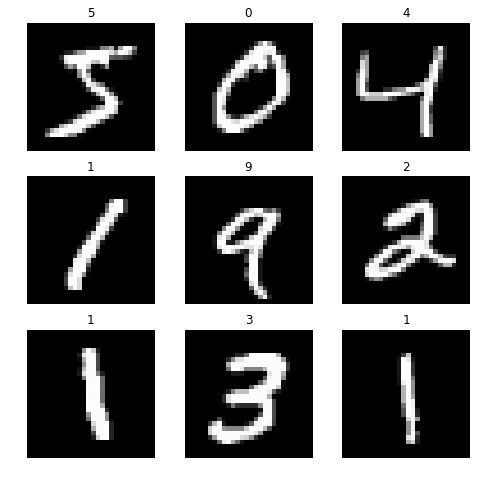

(60000, 28, 28)


In [2]:
import keras
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

draw_subplot(X_train,y_train)
print(X_train.shape)

# Random Rotations #

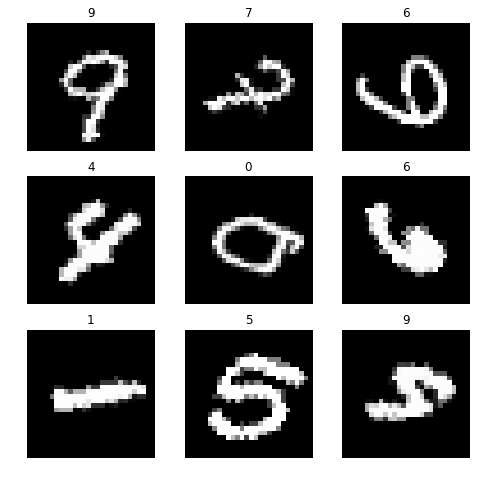

(9, 28, 28)


In [3]:
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import matplotlib.pyplot as plt

# reshape the size, before [num of sample,width,height], after [num of sample,width,height,channel]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test  = X_test.reshape(X_test.shape[0], 28, 28, 1)

# type from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# define ImageDataGenerator ,rotation_range=90
datagen = ImageDataGenerator(rotation_range=90)

# Calculate any statistical parameters need to actually perform the conversion to image data
datagen.fit(X_train)


for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    X_batch = X_batch.reshape(X_batch.shape[0],28,28)
    draw_subplot(X_batch,y_batch)
    
    print(X_batch.shape)
    break 

# Random Shifts #

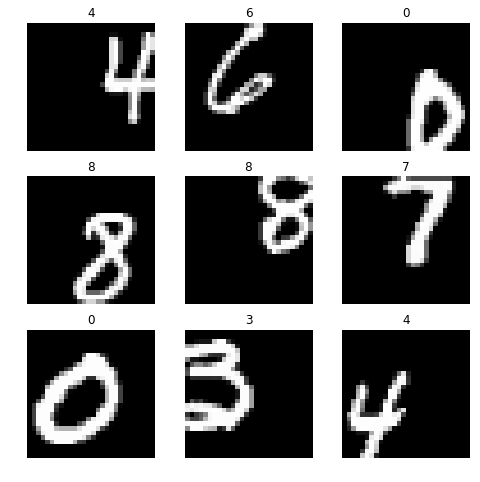

(9, 28, 28)


In [4]:
shift = 0.3
datagen = ImageDataGenerator(width_shift_range=shift, height_shift_range=shift)
datagen.fit(X_train)

for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    X_batch = X_batch.reshape(X_batch.shape[0],28,28)
    draw_subplot(X_batch,y_batch)
    
    print(X_batch.shape)
    break 

# Random Shear(隨機推移錯切) #

> 透過一個圖像的錯切變換，圖像以它的中心垂直軸不變動的方式變形。可以用這樣的技術來產生新的經過錯切變換的圖像數據。

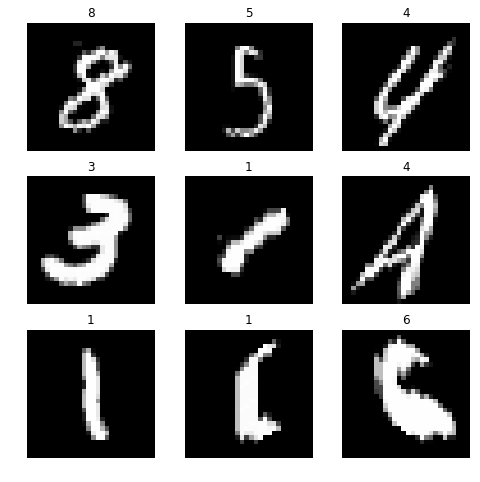

(9, 28, 28)


In [5]:
# the intensity of the Shear
shear_range=1.25 
datagen = ImageDataGenerator(shear_range=shear_range)
datagen.fit(X_train)

for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    X_batch = X_batch.reshape(X_batch.shape[0],28,28)
    draw_subplot(X_batch,y_batch)
    
    print(X_batch.shape)
    break 

# Random Flips(隨機鏡像翻轉) #


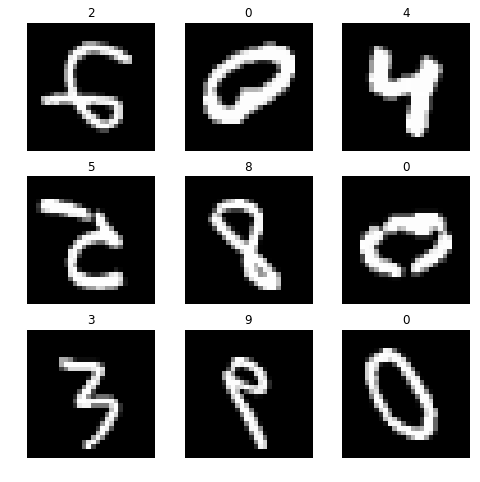

(9, 28, 28)


In [6]:
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
datagen.fit(X_train)

for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    X_batch = X_batch.reshape(X_batch.shape[0],28,28)
    draw_subplot(X_batch,y_batch)
    
    print(X_batch.shape)
    break 

# Feature Standardization(影像特徵標準化) #
> 把整個數據集中的每個像素值來進行標準化(standardize pixel)。

> 這被稱為特徵標準化，可以想像影像特徵標準化的程序如同對一般表格數據集中每個列會進次的資料標準化。

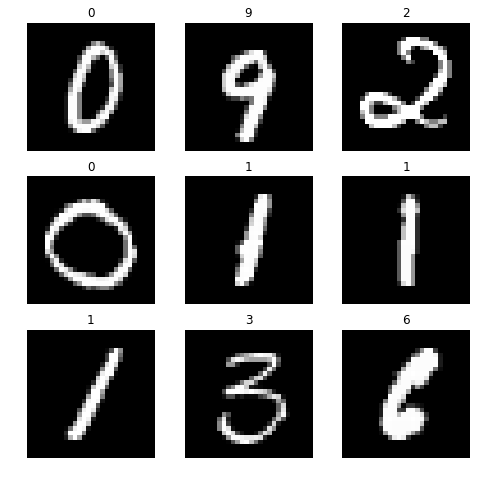

(9, 28, 28)


In [7]:
datagen = ImageDataGenerator(featurewise_center=True, 
                             featurewise_std_normalization=True)
datagen.fit(X_train)

for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    X_batch = X_batch.reshape(X_batch.shape[0],28,28)
    draw_subplot(X_batch,y_batch)
    
    print(X_batch.shape)
    break 

# ZCA Whitening(ZCA 白化轉換) #
> 圖像的白化變換是為了減少圖像像素矩陣中的冗餘/去除相關性(共線性)的線性特徵所進行的代數運算轉換。

> 進行圖像中像素矩陣去除相關性的轉換是為了更好地突顯圖像中的結構和特徵到學習演算法。

> 這個轉換的概念在以前大多是使用主成分分析（PCA）技術來執行圖像白化。最近，ZCA的技術顯示了更好的結果，對圖像進行ZCA轉換後的圖像可以保留原始尺寸的大小，從而使轉換後的圖像仍然看起來像原始圖像(這一點與PCA是不同的)。

> 將zca_whitening參數設置為True來執行ZCA白化轉換。

> 可以在圖像中看到相同的一般數字結構以及每個數字的輪廓如何被突顯。

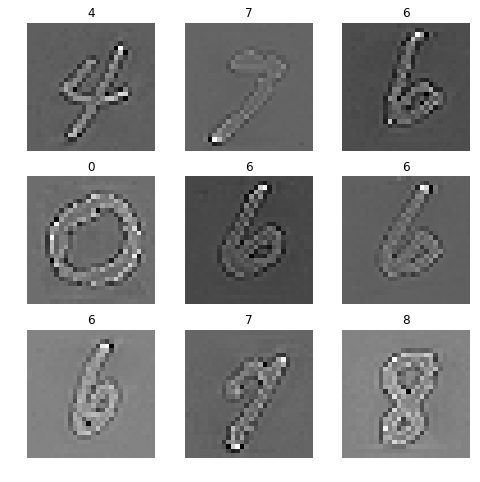

(9, 28, 28)


In [8]:
datagen = ImageDataGenerator(zca_whitening=True)
datagen.fit(X_train)

for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    X_batch = X_batch.reshape(X_batch.shape[0],28,28)
    draw_subplot(X_batch,y_batch)
    
    print(X_batch.shape)
    break 

# Saving Augmented Images to File(儲存增強的圖像數據) #

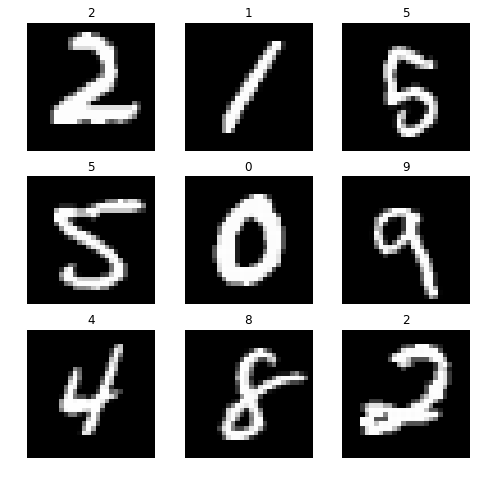

(9, 28, 28)


In [10]:
import os

datagen = ImageDataGenerator()
datagen.fit(X_train)

# Generate a directory to save the image file
if not os.path.exists('images'):
    os.makedirs('images')
    
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9, save_to_dir='images', save_prefix='aug', save_format='png'):
    X_batch = X_batch.reshape(X_batch.shape[0],28,28)
    draw_subplot(X_batch,y_batch)
    
    print(X_batch.shape)
    break 